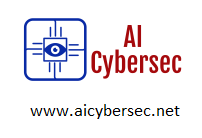

# Visualizing CARTs with admissions data



---

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.


---

### 1. Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX - not sure what linux uses). The command will be `brew install graphviz`
- Install `pydotplus` with `conda install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [1]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
#from sklearn.externals.six import StringIO
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

---

### 2. Load in admissions data and other python packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
admit = pd.read_csv('admissions.csv')

---

### 3. Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [4]:
# focus on data we have for the time being.
# dont want to spend an unessary amount of time cleaning.
admit = admit.dropna()

In [5]:
admit.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [6]:
Xr = admit[['admit', 'gre', 'prestige']]
yr = admit.gpa.values

Xc = admit[['gpa', 'gre', 'prestige']]
yc = admit.admit.values

---

### 4. Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [7]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [8]:
# cross val Linear Reg with 4 folds
reg_scores = cross_val_score(LinearRegression(), Xr, yr, cv=4)
# cross val Log Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), Xc, yc, cv=4)

# get scores
print (reg_scores, np.mean(reg_scores))
print (cls_scores, np.mean(cls_scores))

[0.22470964 0.08296819 0.03204903 0.16434809] 0.12601873539032843
[0.71       0.72727273 0.68686869 0.70707071] 0.7078030303030304


In [9]:
# fit models
linreg = LinearRegression().fit(Xr, yr)  # R2
logreg = LogisticRegression().fit(Xc, yc)  # accuracy

_Linear regression is overall terrible, Log reg is also not great if you check the baseline:

In [10]:
1-sum(pd.Series(yc))/len(yc)

0.6826196473551638

---

### 5. Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
# set 4 models
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [13]:
# fit the 4 models
dtr1.fit(Xr, yr)
dtr2.fit(Xr, yr)
dtr3.fit(Xr, yr)
dtrN.fit(Xr, yr)

DecisionTreeRegressor()

In [14]:
# cross validate the 4 models
dtr1_scores = cross_val_score(dtr1, Xr, yr, cv=4)
dtr2_scores = cross_val_score(dtr2, Xr, yr, cv=4)
dtr3_scores = cross_val_score(dtr3, Xr, yr, cv=4)
dtrN_scores = cross_val_score(dtrN, Xr, yr, cv=4)

# score the 4 models
print(dtr1_scores, np.mean(dtr1_scores))
print(dtr2_scores, np.mean(dtr2_scores))
print(dtr3_scores, np.mean(dtr3_scores))
print(dtrN_scores, np.mean(dtrN_scores))

[0.16618105 0.1535036  0.03860296 0.10081223] 0.1147749611042106
[0.20722899 0.14179888 0.04112242 0.11836674] 0.1271292579858376
[0.15422529 0.123802   0.05252648 0.08070045] 0.10281355747790255
[-0.1467712  -0.15842446 -0.4649248  -0.17945056] -0.23739275308561208


In [15]:
for i in range(1, 10):
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(Xr, yr)
    dtc_scores = cross_val_score(dtc, Xr, yr, cv=4)

    print (dtc_scores, np.mean(dtc_scores))

[0.16618105 0.1535036  0.03860296 0.10081223] 0.1147749611042107
[0.20722899 0.14179888 0.04112242 0.11836674] 0.1271292579858378
[0.15422529 0.123802   0.05252648 0.08070045] 0.10281355747790286
[ 0.15309715  0.14984917 -0.01770335  0.07249873] 0.08943542573496441
[ 0.13908672  0.16721313 -0.05791498  0.04980234] 0.0745468000294228
[-0.07090303  0.07424312 -0.08971894 -0.03575663] -0.030533867195361886
[-0.07050364  0.06438298 -0.20355691 -0.10956936] -0.07981173280622583
[-0.08943881 -0.05521875 -0.31284152 -0.13188691] -0.14734649877747413
[-0.11297395 -0.0950646  -0.46440691 -0.17086939] -0.2108287125766336


The default score here is R2 (cf.: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) . We have a much better results than with the linear regression. Also this allows to visualise the increase and then decrease of the R2 score in fct of the depth.

---

### 6. Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node


_For reference: this method of showing the model creates a output file using graphviz that then gets read in using pydotplus._

In [17]:
# TEMPLATE CODE
#from sklearn.externals.six import StringIO
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO()

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# To save the tree
# graph.write_png('./dtr1.png')

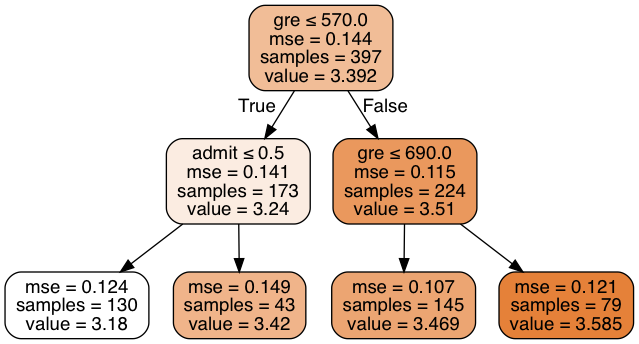

In [ ]:
# max depth = 2
dot_data = StringIO()

export_graphviz(dtr2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

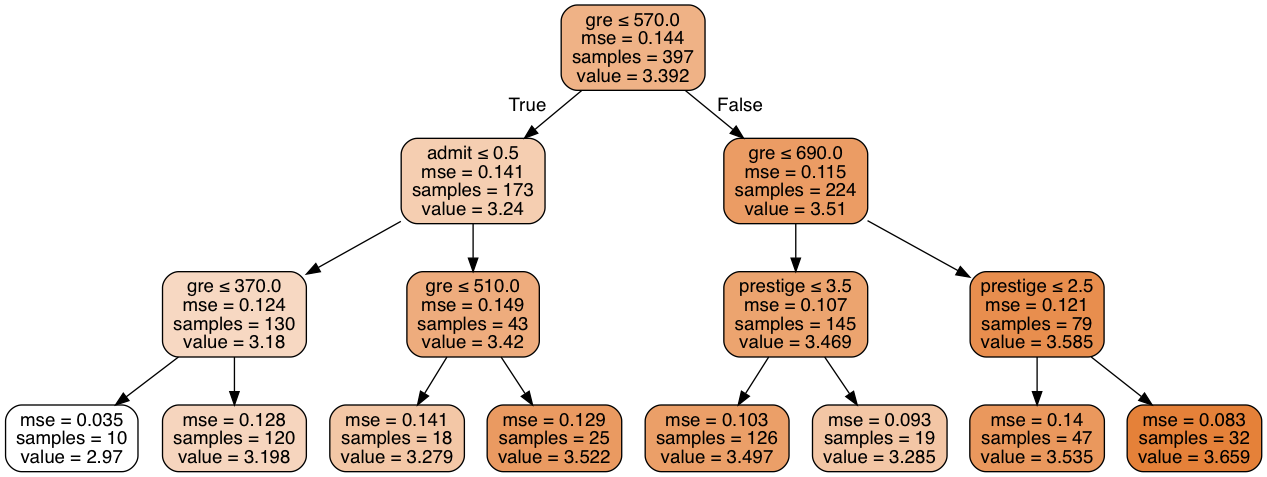

In [ ]:
# max depth = 3
dot_data = StringIO()

export_graphviz(dtr3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

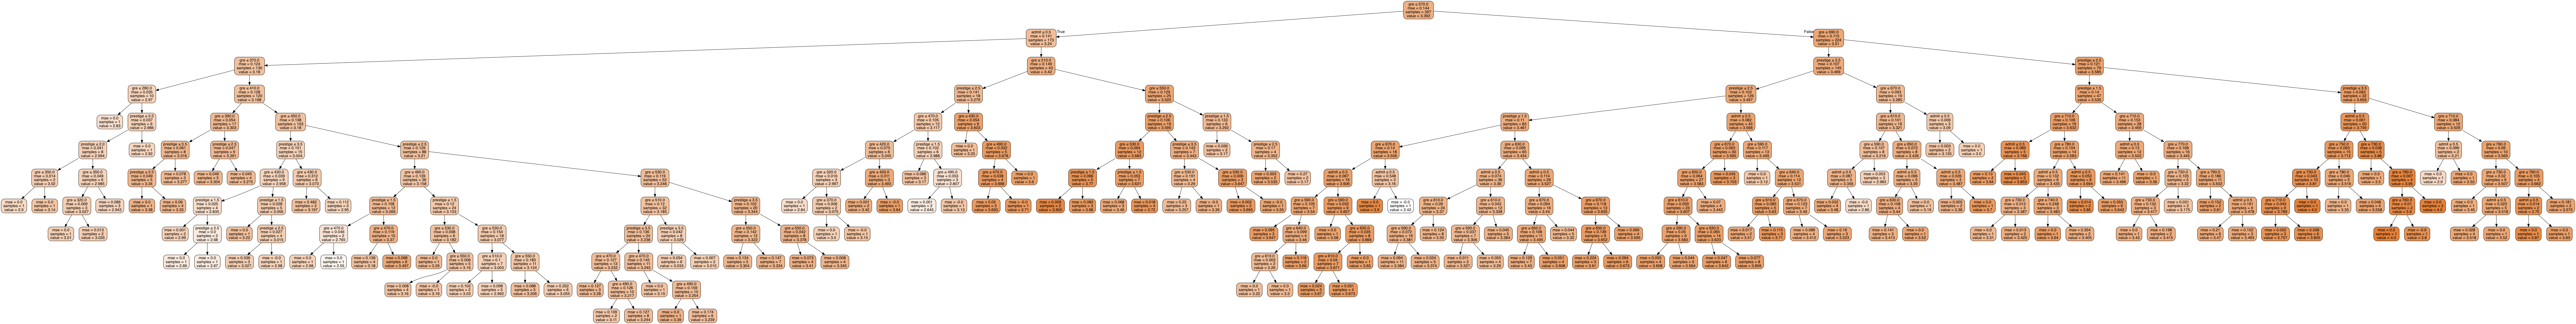

In [ ]:
# max_depth = none
# keeps creating trees until purity = 1
dot_data = StringIO()

export_graphviz(dtrN, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# To save the tree
graph.write_png('./dtrN_tree.png')

True

---

### 7. Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# set 4 trees
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [ ]:
# fit 4 trees
dtc1.fit(Xc, yc)
dtc2.fit(Xc, yc)
dtc3.fit(Xc, yc)
dtcN.fit(Xc, yc)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# np.logspace(1., 10., num=120, endpoint=True, base=np.e)

In [ ]:
# use CV to evaluate the 4 trees
dtc1_scores = cross_val_score(dtc1, Xc, yc, cv=4)
dtc2_scores = cross_val_score(dtc2, Xc, yc, cv=4)
dtc3_scores = cross_val_score(dtc3, Xc, yc, cv=4)
dtcN_scores = cross_val_score(dtcN, Xc, yc, cv=4)

print (dtc1_scores, np.mean(dtc1_scores))
print (dtc2_scores, np.mean(dtc2_scores))
print (dtc3_scores, np.mean(dtc3_scores))
print (dtcN_scores, np.mean(dtcN_scores))

[0.68       0.68       0.66666667 0.68367347] 0.6775850340136055
[0.69       0.77       0.62626263 0.62244898] 0.6771779014636158
[0.77       0.77       0.60606061 0.70408163] 0.7125355596784169
[0.6        0.65       0.58585859 0.6122449 ] 0.6120258709544424


*Classification does better than its counterparts.  We can start to see how achieving completely pure leaves creates overfitting as `max_depth = none` is the worse performing model.*

---

### 8. Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

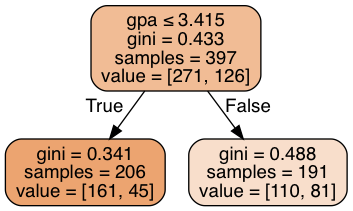

In [ ]:
# max_depth = 1
dot_data = StringIO()

export_graphviz(dtc1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
sum(yc)

126

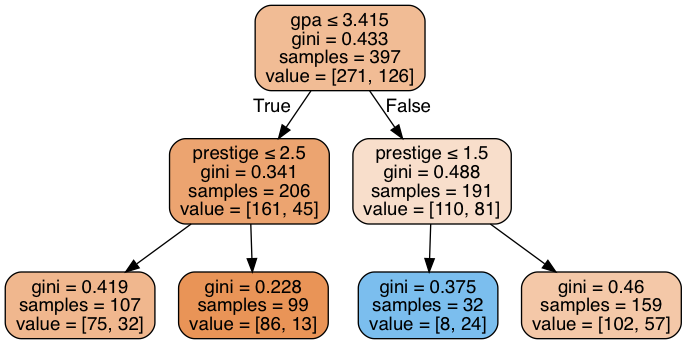

In [ ]:
# max_depth = 2
dot_data = StringIO()

export_graphviz(dtc2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

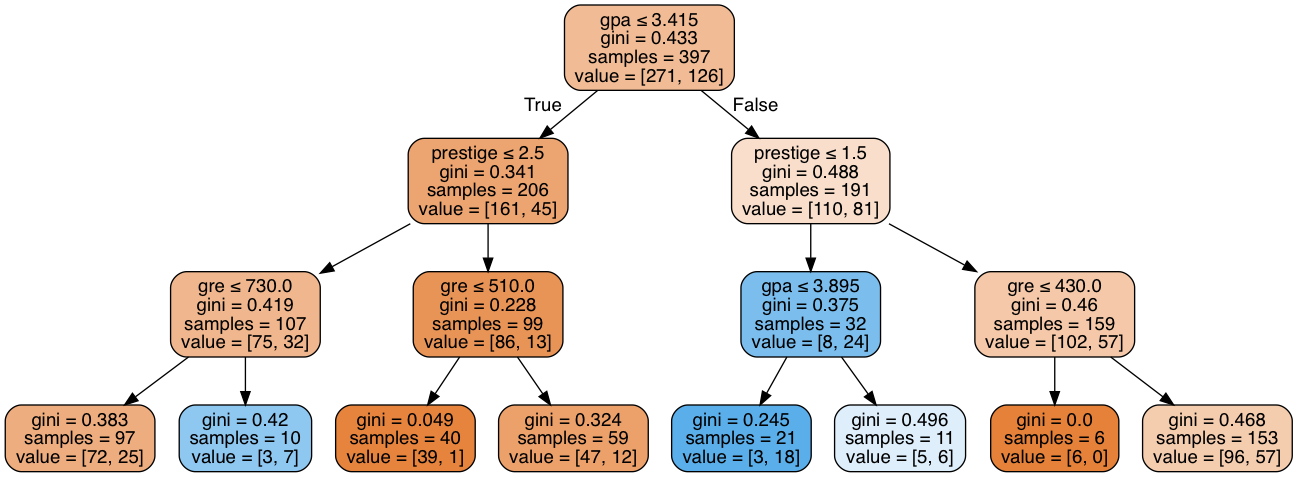

In [ ]:
# max_depth = 3
dot_data = StringIO()

export_graphviz(dtc3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

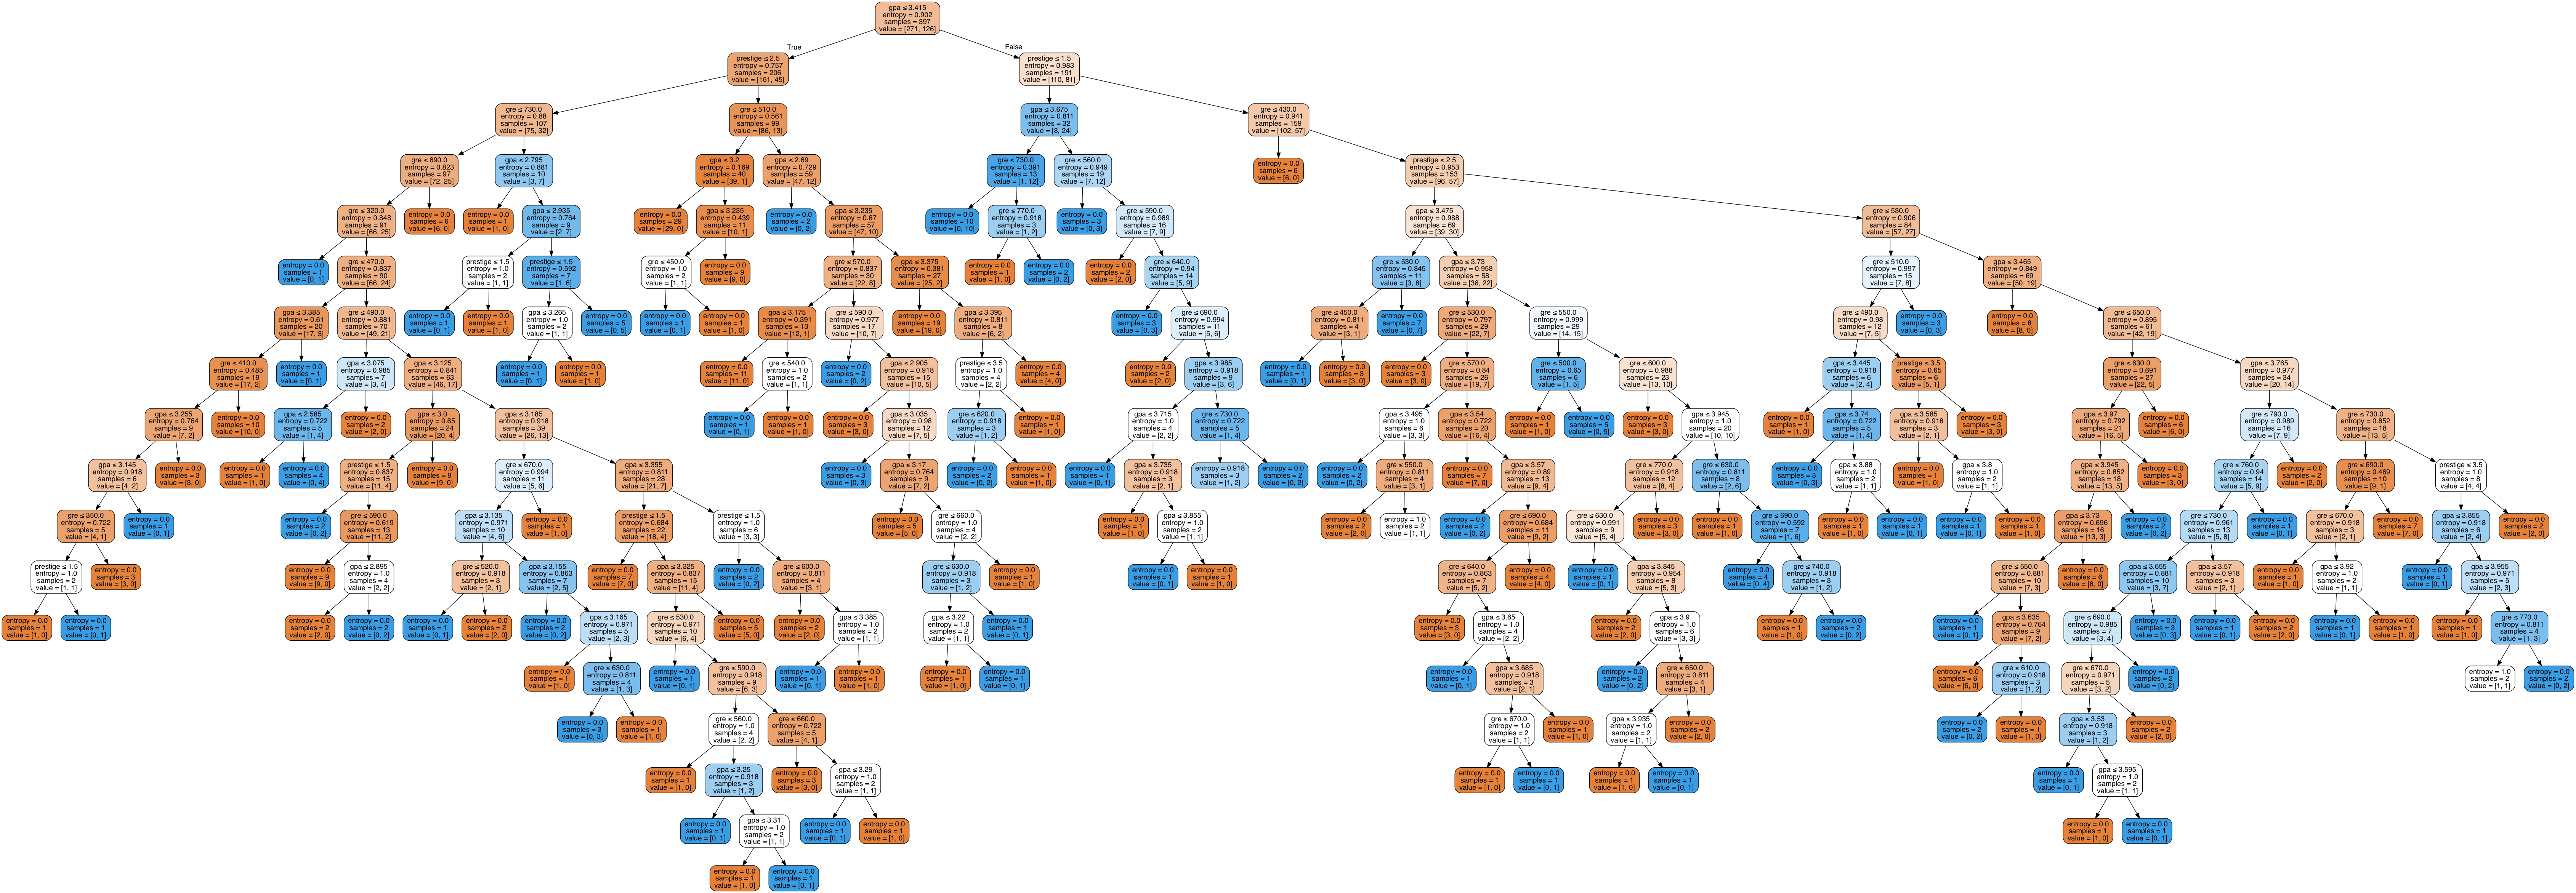

In [ ]:
# max_depth = 4
dot_data = StringIO()

export_graphviz(dtcN, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

_Thats a lot of decisions!_

---

### 9. Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up over fitting the training data. Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [ ]:
col = pd.read_csv('../datasets/College.csv')

In [ ]:
col.head(2)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56

In [ ]:
y = col.Private.map(lambda x: 1 if x == 'Yes' else 0)
X = col.iloc[:, 2:]

---

### 10. Building classification trees

With `DecisionTreeClassifier`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.


In [ ]:
for i in range(1,X.shape[1]):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X, y)
    dtc_scores = cross_val_score(dtc, X, y, cv=4)
    print (dtc_scores, np.mean(dtc_scores))
    

[0.87179487 0.82474227 0.83505155 0.83505155] 0.8416600581549035
[0.90769231 0.89690722 0.91752577 0.91237113] 0.908624107850912
[0.8974359  0.92268041 0.91752577 0.90721649] 0.9112146444620671
[0.8974359  0.90721649 0.91752577 0.91752577] 0.9099259846682527
[0.8974359  0.92783505 0.88659794 0.89690722] 0.9021940259053661
[0.90769231 0.92268041 0.87628866 0.90721649] 0.9034694686756543
[0.89230769 0.91237113 0.89175258 0.90206186] 0.8996233148295004
[0.90769231 0.91752577 0.87628866 0.89690722] 0.899603489294211
[0.88717949 0.91752577 0.87628866 0.91237113] 0.898341263547449
[0.9025641  0.91752577 0.87113402 0.91752577] 0.902187417393603
[0.9025641  0.91237113 0.8814433  0.91237113] 0.902187417393603
[0.8974359  0.91237113 0.8814433  0.90206186] 0.8983280465239228
[0.88717949 0.90206186 0.87628866 0.90721649] 0.8931866243721913
[0.9025641  0.91752577 0.85051546 0.90721649] 0.8944554586307163
[0.88717949 0.90206186 0.87113402 0.90206186] 0.8906093047845625
[0.89230769 0.90721649 0.87628

In [ ]:
# set 4 trees
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [ ]:
# fit 4 trees
dtc1.fit(X, y)
dtc2.fit(X, y)
dtc3.fit(X, y)
dtcN.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# use CV to evaluate the 4 trees
dtc1_scores = cross_val_score(dtc1, X, y, cv=4)
dtc2_scores = cross_val_score(dtc2, X, y, cv=4)
dtc3_scores = cross_val_score(dtc3, X, y, cv=4)
dtcN_scores = cross_val_score(dtcN, X, y, cv=4)

print(dtc1_scores, np.mean(dtc1_scores))
print(dtc2_scores, np.mean(dtc2_scores))
print(dtc3_scores, np.mean(dtc3_scores))
print(dtcN_scores, np.mean(dtcN_scores))

[0.87179487 0.82474227 0.83505155 0.83505155] 0.8416600581549035
[0.90769231 0.89690722 0.91752577 0.91237113] 0.908624107850912
[0.8974359  0.92268041 0.91752577 0.90721649] 0.9112146444620671
[0.8974359  0.91752577 0.88659794 0.90206186] 0.9009053661115517


---

### 11. Set up and run the gridsearch on the data

In [ ]:
# gridsearch params
dtc_params = {
    'max_depth': range(1,20),
    'max_features': [None, 'log2', 'sqrt'],
    'min_samples_split': range(5,30),
    'max_leaf_nodes': [None],
    'min_samples_leaf': range(1,10)
}
# Milly
# dtc_params ={'max_features': 9, 'max_leaf_nodes': None, 'min_samples_split': 16, 'max_depth': 10, 'min_samples_leaf': 5}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(),
                      dtc_params, cv=5, verbose=1, n_jobs=-1)

In [ ]:
# use the gridearc C model to fit the data
dtc_gs.fit(X, y)

Fitting 5 folds for each of 12825 candidates, totalling 64125 fits


[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9272 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 22272 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 40472 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 64125 out of 64125 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'max_features': [None, 'log2', 'sqrt'], 'min_samples_split': range(5, 30), 'max_leaf_nodes': [None], 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [ ]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 19, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 8, 'min_samples_split': 14}
0.9279279279279279


In [ ]:
# Some improvement in scores  and still better than all 
# the previous ones.

In [ ]:
sum(y)/len(y)

0.7271557271557272

---

### 12. print out the "feature importances"

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

In [ ]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

feature  importance
2        Enroll    0.477823
7      Outstate    0.238615
15       Expend    0.127219
6   P.Undergrad    0.064524
12     Terminal    0.019912
3     Top10perc    0.018197
0          Apps    0.013309
5   F.Undergrad    0.012183
11          PhD    0.011214
16    Grad.Rate    0.008748
13    S.F.Ratio    0.005824
4     Top25perc    0.002432
10     Personal    0.000000
9         Books    0.000000
1        Accept    0.000000
14  perc.alumni    0.000000
8    Room.Board    0.000000

In [ ]:
# Looks like there are about 7 features that do not help 
# making decisions.